<h1 style="color:#2b6692; FONT-FAMILY: Inter, ui-sans-serif, system-ui, Helvetica, Arial, sans-serif; FONT-SIZE :40px; LINE-HEIGHT:40px; text-align:center; LETTER-SPACING: -2.205px"> <strong>Stock Analysis of Tech companies & <br> Prediction using Long Short-Term Memory </strong><span class="tocSkip"></span></h1>

<img src="55.png"  width="600" height="800" style="vertical-align:middle" alt="Stock Analysis with Python" align="middle" class="center"> 

Here, we look at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-was-the-change-in-price-of-the-stock-overtime?" data-toc-modified-id="What-was-the-change-in-price-of-the-stock-overtime?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What was the change in price of the stock overtime?</a></span></li><li><span><a href="#What-was-the-moving-average-of-the-various-stocks?" data-toc-modified-id="What-was-the-moving-average-of-the-various-stocks?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What was the moving average of the various stocks?</a></span></li><li><span><a href="#What-was-the-daily-return-of-the-stock-on-average?" data-toc-modified-id="What-was-the-daily-return-of-the-stock-on-average?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>What was the daily return of the stock on average?</a></span></li><li><span><a href="#What-was-the-correlation-between-different-stocks-closing-prices?" data-toc-modified-id="What-was-the-correlation-between-different-stocks-closing-prices?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>What was the correlation between different stocks closing prices?</a></span></li><li><span><a href="#How-much-value-do-we-put-at-risk-by-investing-in-a-particular-stock?" data-toc-modified-id="How-much-value-do-we-put-at-risk-by-investing-in-a-particular-stock?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>How much value do we put at risk by investing in a particular stock?</a></span></li><li><span><a href="#Predicting-the-closing-price-stock-price-of-GOOGLE-inc" data-toc-modified-id="Predicting-the-closing-price-stock-price-of-GOOGLE-inc-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predicting the closing price stock price of GOOGLE inc</a></span></li></ul></div>

# What was the change in price of the stock overtime?

In this section, handle requesting stock information with pandas, and to analyze basic attributes of a stock. 

Start with importing libraries <b> pandas, numpy, matplotlib, seaborn & yfinance</b> (to download data from online platform yahoo).

After that we download the stock data of all required tech companies(apple, google, microsoft, amazon) of 1 year with starting date = '2020-10-28' & ending date = '2021-10-28'. 
Then combine whole data set of each comapanies using zip() function, also to distinguih the data, a coloumn added which name companies name parallel to the dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import yfinance as yf

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

#for time stamps
from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [2]:
# Set the start and end date
start_date = '2020-10-28'
end_date = '2021-10-28'

ticker = 'AAPL'
appl = yf.download(ticker, start_date, end_date)

ticker = 'GOOG'
goog = yf.download(ticker, start_date, end_date)

ticker = 'MSFT'
msft = yf.download(ticker, start_date, end_date)

ticker = 'AMZN'
amzn = yf.download(ticker, start_date, end_date)

company_list = [appl, goog, msft, amzn]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-10-27  115.489998  117.279999  114.540001  116.599998  115.686005   
2020-10-28  115.050003  115.430000  111.099998  111.199997  110.328331   
2020-10-29  112.370003  116.930000  112.199997  115.320000  114.416039   
2020-10-30  111.059998  111.989998  107.720001  108.860001  108.006676   
2020-11-02  109.110001  110.680000  107.320000  108.769997  107.917366   
2020-11-03  109.660004  111.489998  108.730003  110.440002  109.574295   
2020-11-04  114.139999  115.589996  112.349998  114.949997  114.048943   
2020-11-05  117.949997  119.620003  116.870003  119.029999  118.096954   
2020-11-06  118.320000  119.199997  116.129997  118.690002  117.962791   
2020-11-09  120.500000  121.989998  116.050003  116.320000  115.607307   

               Volume company_name  
Date                                
2020-10-27   92276800        APPLE  
2020-10-28  143937800        APPLE  
2020-10-29  146129200        APPLE  
2020-10-30  190272600        APPLE  
2020-11-02  122866900        APPLE  
2020-11-03  107624400        APPLE  
2020-11-04  138235500        APPLE  
2020-11-05  126387100        APPLE  
2020-11-06  114457900        APPLE  
2020-11-09  154515300        APPLE

Summary Status using describe()

In [3]:
# Summary Stats
appl.describe()

Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   133.404348  134.758617  132.012845  133.432055  132.920135   
std     11.002849   10.936415   11.051245   11.028159   11.171935   
min    109.110001  110.680000  107.320000  108.769997  107.917366   
25%    124.529999  126.150002  123.089996  124.970001  124.539215   
50%    132.160004  133.750000  130.929993  132.029999  131.401062   
75%    143.660004  144.889999  142.649994  143.759995  143.550491   
max    156.979996  157.259995  154.389999  156.690002  156.461655   

             Volume  
count  2.530000e+02  
mean   9.275860e+07  
std    2.958864e+07  
min    4.639770e+07  
25%    7.243410e+07  
50%    8.766880e+07  
75%    1.077601e+08  
max    1.925415e+08

General information using info()

In [4]:
# General info
appl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-10-27 to 2021-10-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


Visualization using historical view of the closing price

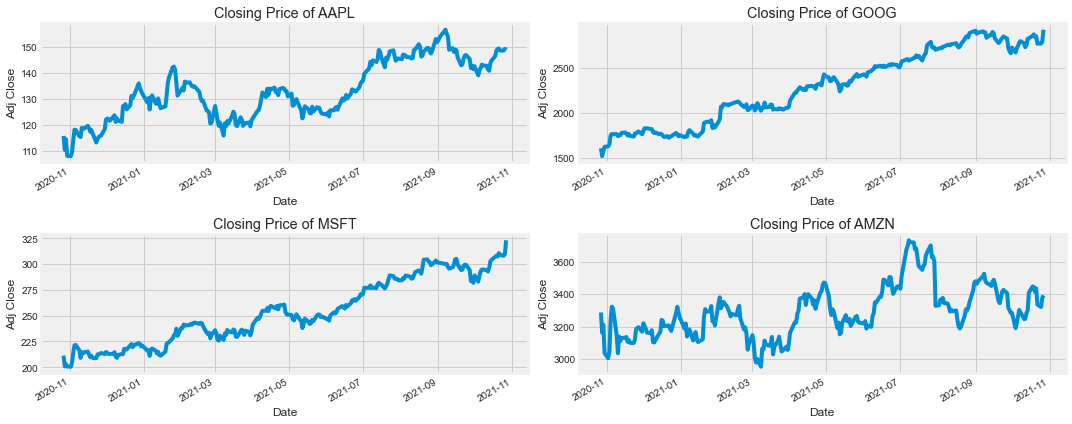

In [5]:
# a historical view of the closing price

plt.figure(figsize=(15,6))
plt.subplots_adjust(top =1.25, bottom =1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Visualization using historical view of the total volume. 

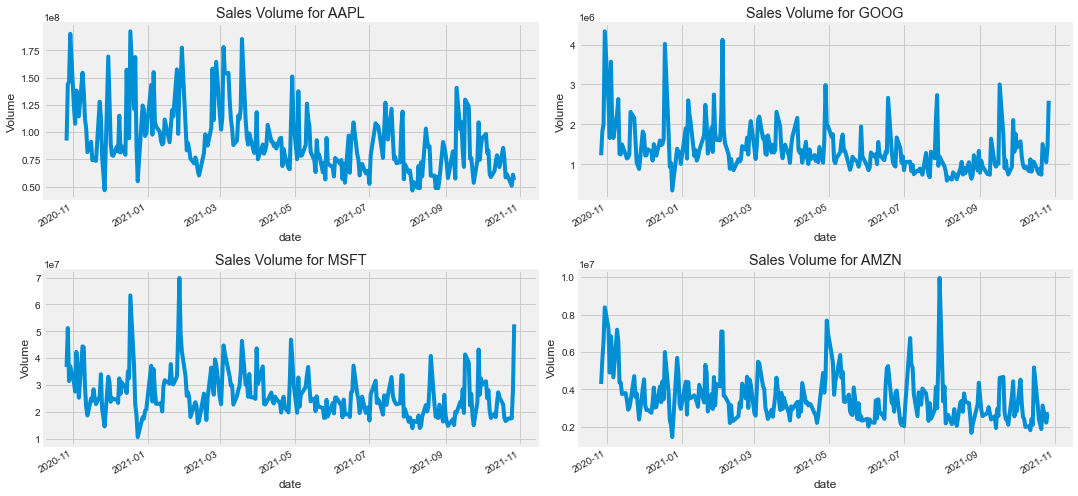

In [6]:
# Now let's plot the total volume of stock being traded each day

plt.figure(figsize = (15,7))
plt.subplots_adjust(top =1.25, bottom =1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel("Volume")
    plt.xlabel ("date")
    plt.title(f"Sales Volume for {tech_list[i-1]}")
    
plt.tight_layout()

# What was the moving average of the various stocks?

Let's move forward and look the moving average for 10, 20 & 50 days of various stocks. 
Firstly added the column for each moving average including days and parallely it's value via calculating mean of 'Adj Close' column. 
The following table shows the tail data of 10 rows.

In [7]:
ma_day =[10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [8]:
print(goog.tail(10))

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-10-14  2799.040039  2833.030029  2786.780029  2828.239990  2828.239990   
2021-10-15  2844.000000  2844.000000  2821.290039  2833.500000  2833.500000   
2021-10-18  2824.270020  2859.975098  2824.270020  2859.209961  2859.209961   
2021-10-19  2865.830078  2882.139893  2861.919922  2876.439941  2876.439941   
2021-10-20  2884.449951  2884.955078  2838.239990  2848.300049  2848.300049   
2021-10-21  2843.840088  2856.989990  2832.739990  2855.610107  2855.610107   
2021-10-22  2807.020020  2831.169922  2743.409912  2772.500000  2772.500000   
2021-10-25  2776.209961  2784.115967  2734.969971  2775.459961  2775.459961   
2021-10-26  2812.120117  2816.790039  2780.110107  2793.439941  2793.439941   
2021-10-27  2798.050049  2982.360107  2798.050049  2928.550049  2928.550049   

             Volume company_name  MA for 10 days  M

Ploting all the Moving Averages using matplotlib (subplot axes 2*2). 

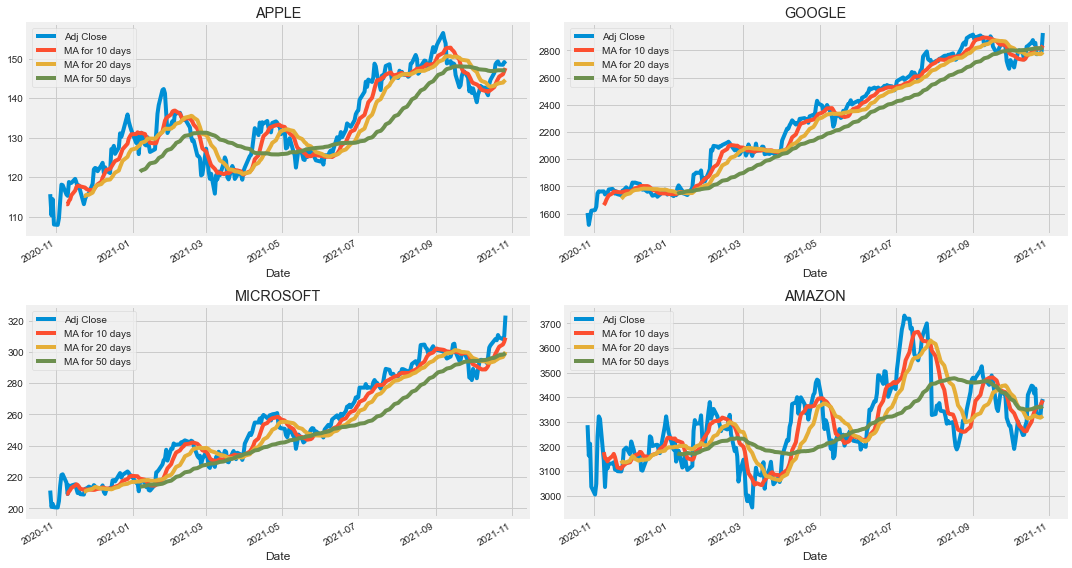

In [9]:
fig, axes = plt.subplots(nrows=2, ncols =2)
fig.set_figheight(8)
fig.set_figwidth(15)

appl[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

goog[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

msft[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

amzn[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

#  What was the daily return of the stock on average?

Till now only did some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

Steps will be, creating a new column contains value percentage of 'adj close' value. Then plotting again using subplot axes 2*2. (Here we used line style '--' & marker 'o'.

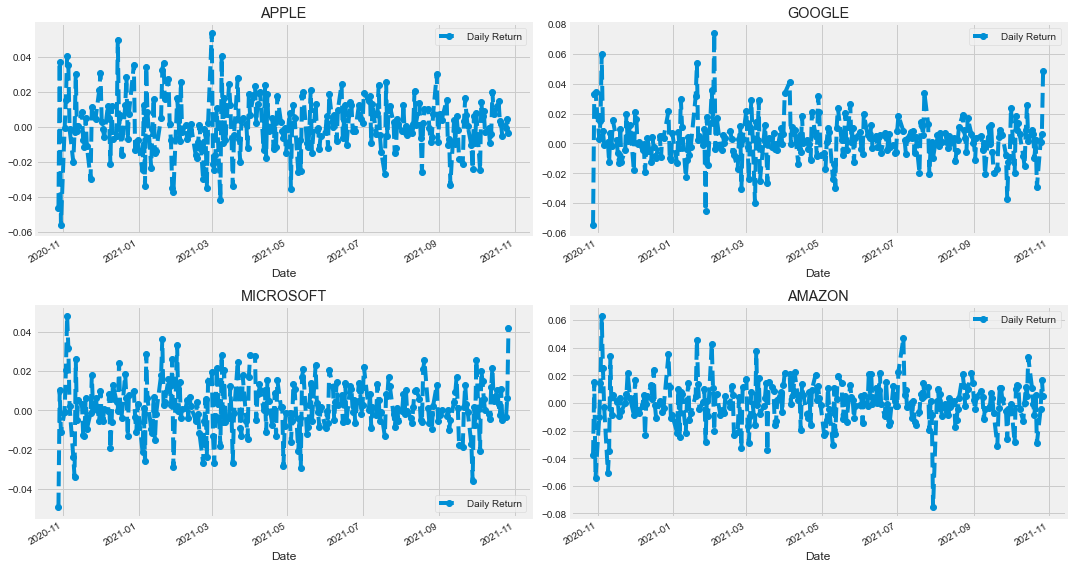

In [10]:
# we'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
#Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows =2, ncols =2)
fig.set_figheight(8)
fig.set_figwidth(15)

appl['Daily Return'].plot(ax=axes[0,0], legend = True, linestyle ='--', marker='o')
axes[0,0].set_title('APPLE')

goog['Daily Return'].plot(ax=axes[0,1], legend = True, linestyle ='--', marker ='o')
axes[0,1].set_title('GOOGLE')

msft['Daily Return'].plot(ax=axes[1,0], legend = True, linestyle ='--', marker ='o')
axes[1,0].set_title('MICROSOFT')

amzn['Daily Return'].plot(ax=axes[1,1], legend = True, linestyle ='--', marker ='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Below is an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

Steps will be, usinf foe lopp and plotting subplot, with seaborn (using displot), 

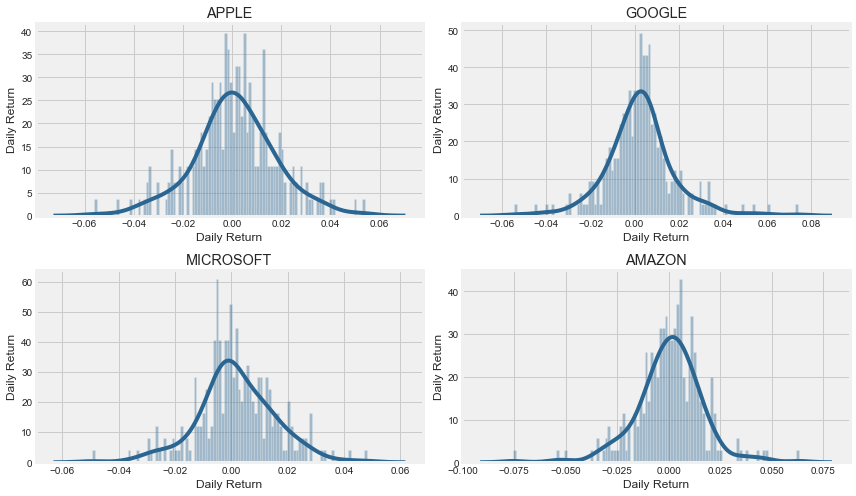

In [11]:
#Note the use of dropna() here, otherwise the NaN vaues can't be read by seaborn

plt.figure(figsize=(12,7))

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='#2b6692')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')
    
#Could have also done:
# appl['Daily Return'].hist()   

plt.tight_layout()

# What was the correlation between different stocks closing prices?

Building a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [12]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

start_date = '2020-10-28'
end_date = '2021-10-28'

ticker = tech_list
df_closing = yf.download(ticker, start_date, end_date)['Adj Close']

df_closing.head()

[*********************100%***********************]  4 of 4 completed


AAPL         AMZN         GOOG        MSFT
Date                                                        
2020-10-27  115.685997  3286.330078  1604.260010  211.311005
2020-10-28  110.328331  3162.780029  1516.619995  200.837112
2020-10-29  114.416031  3211.010010  1567.239990  202.858566
2020-10-30  108.006683  3036.149902  1621.010010  200.629013
2020-11-02  107.917374  3004.479980  1626.030029  200.490295

Getting the daily return for all the stocks (by converting to percentage using pct.change()), like we did for the Apple stock.  

In [13]:
# Make a new tech returns DataFrame
tech_rets = df_closing.pct_change()
tech_rets.head()

AAPL      AMZN      GOOG      MSFT
Date                                              
2020-10-27       NaN       NaN       NaN       NaN
2020-10-28 -0.046312 -0.037595 -0.054630 -0.049566
2020-10-29  0.037050  0.015249  0.033377  0.010065
2020-10-30 -0.056018 -0.054456  0.034309 -0.010991
2020-11-02 -0.000827 -0.010431  0.003097 -0.000691

Comparing the daily percentage return of two stocks to check how correlated. First  looking a sotck compared to itself.

Steps will be, creating joinplot using seaborn under scatter kind category.
(google vs google)

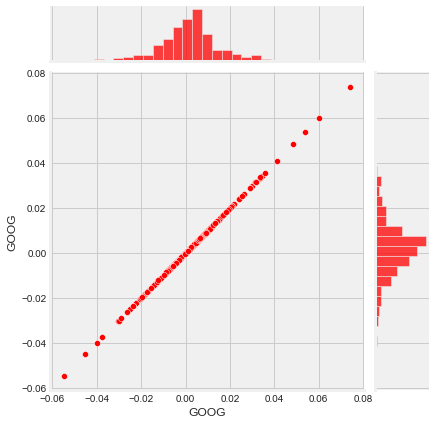

In [14]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG', tech_rets, kind ='scatter', color = 'red')

Creating joinplot using seaborn under scatter kind category.
(google vs microsoft)

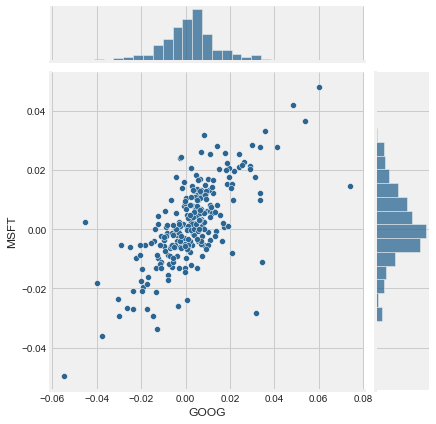

In [15]:
# use joinplot to compare the daily returns of Google and Microsoft

sns.jointplot('GOOG','MSFT', tech_rets, kind ='scatter', color = '#2b6692')

As if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot 

Simply calling pairplot with kind 'reg' on our DataFrame for an automatic visual analysis of all the comparisons

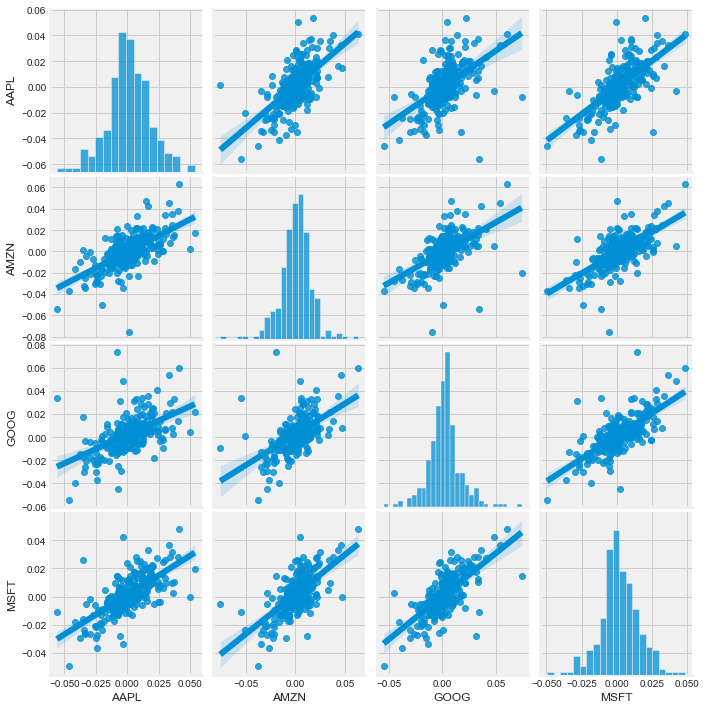

In [16]:
#simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets, kind='reg')

Calling pairplot with kind 'kde' format. 

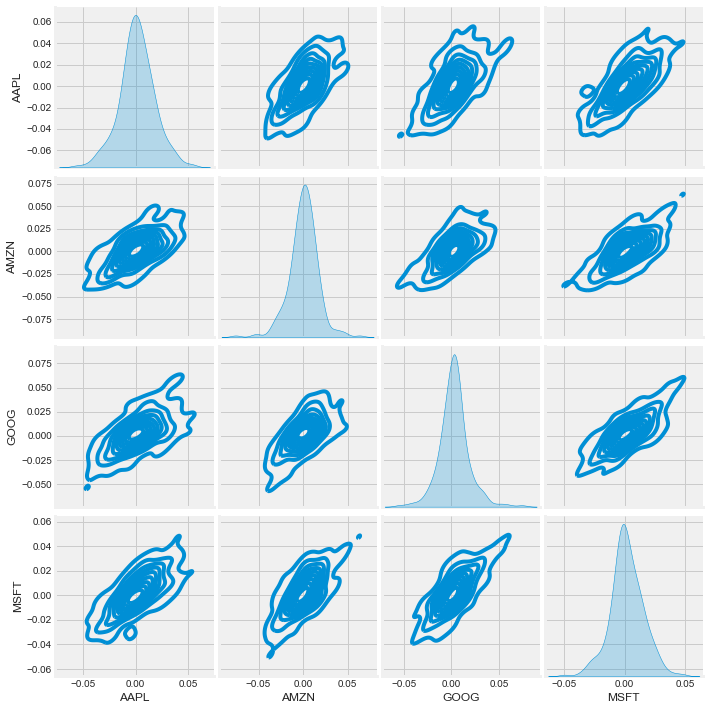

In [17]:
sns.pairplot(tech_rets, kind='kde')

Above did all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result 

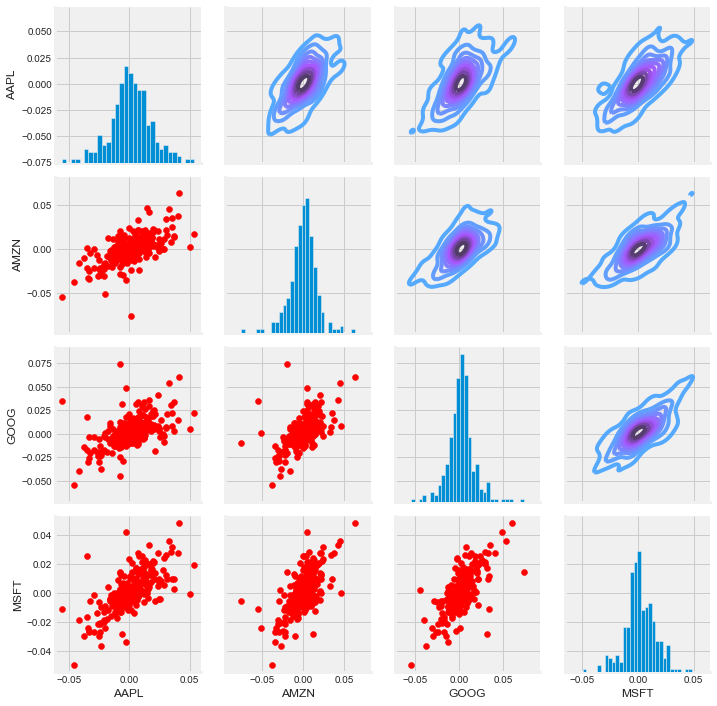

In [18]:
#Setting up fingure by naming it return_fig, call Pairplot on the DataFrame

return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.

return_fig.map_lower(plt.scatter, color='red')

#  We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)

return_fig.map_upper(sns.kdeplot, cmap='cool_d')

# Finally we''l define the daignol as a series of histogram plot of daily return

return_fig.map_diag(plt.hist, bins=30)

After switching upper triangle and lower triangle

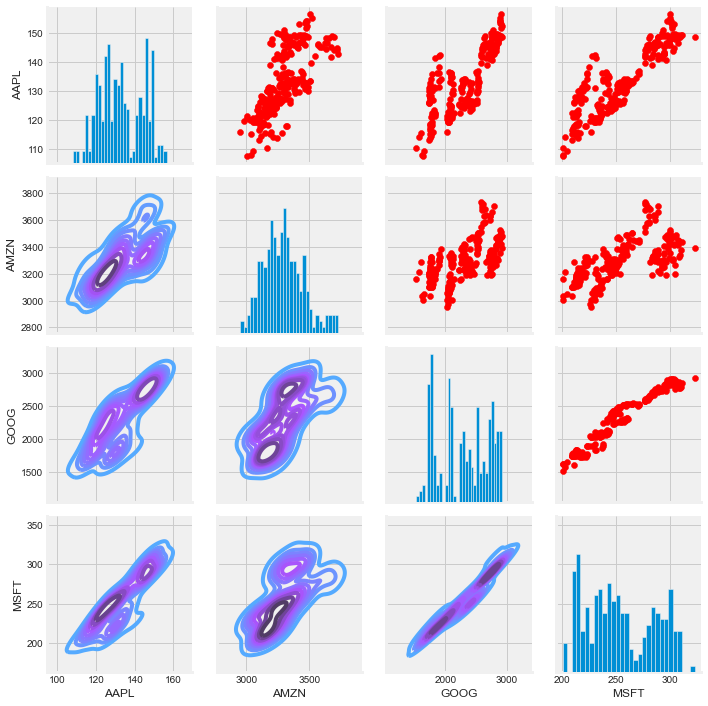

In [19]:
returns_fig = sns.PairGrid(df_closing)

returns_fig.map_upper(plt.scatter, color = 'red')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Using heatmap from seaborn and input value 'tech_rets.corr()' and cmap of 'YlGnBu' .

<AxesSubplot:>

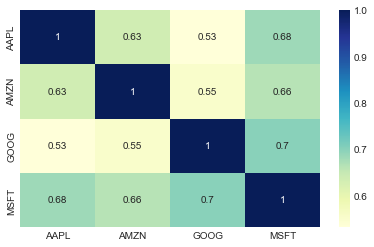

In [20]:
# NOW use seaborn for a quick correlation plot for the daily returns

sns.heatmap(tech_rets.corr(), annot=True, cmap='YlGnBu')

Using heatmap from seaborn and input value 'df_closing.corr()' and cmap of 'summer' .

<AxesSubplot:>

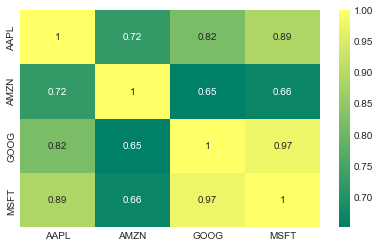

In [21]:
sns.heatmap(df_closing.corr(), annot=True, cmap='summer')

As suspected in our PairPlot, here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated. 

# How much value do we put at risk by investing in a particular stock?

There are many ways to quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns

Let's start by defining a new DataFrame as a clenaed version of the orignal tech_rets DataFrame (using dropna()).Then plotting scatter with 'expected return' x = rets.mean() & 'risk' y = rets.std() with area = 20*pi using numpy.

Here we use annotate to mark for better version. 

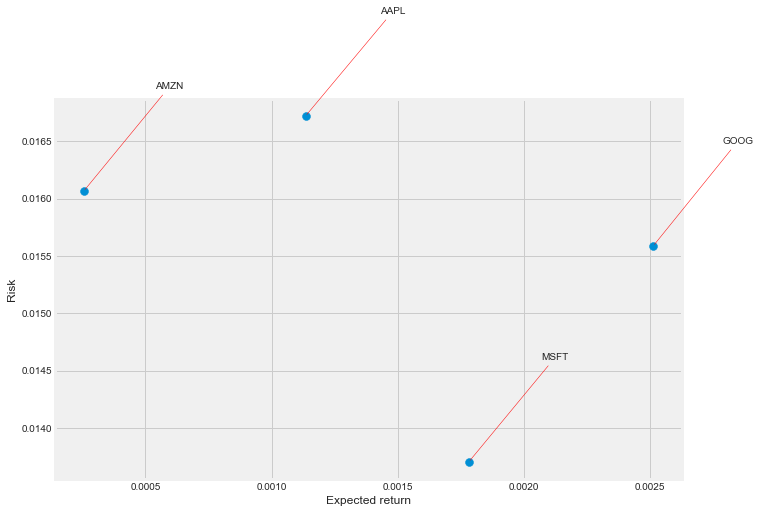

In [22]:
# Let's start by defining a new DataFrame as a clenaed version of the orignal tech_rets DataFrame

rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(10,7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext = (100,100), textcoords ='offset points', ha = 'right', va = 'bottom', arrowprops = dict(arrowstyle='-', color ='red', connectionstyle ='arc3, rad=-0'))

# Data Analysis

We see that volume traded and closing price have an inverse relationship. This relationship is a common practice in finance. If the closing price of a stock decreases, people are more likely to trade a particular stock. However, we see that the data is very spiky. This spikiness is because there are subtle market forces that guide the price fluctuations.

Next, we can use an OHLC chart to visualize the data. The OLHC (open, high, low and close) chart is a financial chart describing open, high, low and close values for a given date.

The horizontal segments represent open and close values, and the tip of the lines represents the low and high values. Points, where the close value is higher than open are called increasing (in green) and decreasing close value is lower than open( in red).

In [33]:
import plotly.graph_objects as go
import pandas as pd

goog = pd.read_csv (r'GOOG.csv')
goog = goog.set_index('Date')

fig = go.Figure(data=go.Ohlc(x =goog.index,
        open=goog['Open'],
        high=goog['High'],
        low=goog['Low'],
        close=goog['Close']))
fig.show()

# Stock Market Data Visualization and Analysis

After you have the stock market data, the next step is to create trading strategies and analyse the performance. The ease of analysing the performance is the key advantage of the Python.

We will analyse the cumulative returns, drawdown plot, different ratios such as

Sharpe ratio, Sortino ratio, and Calmar ratio.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


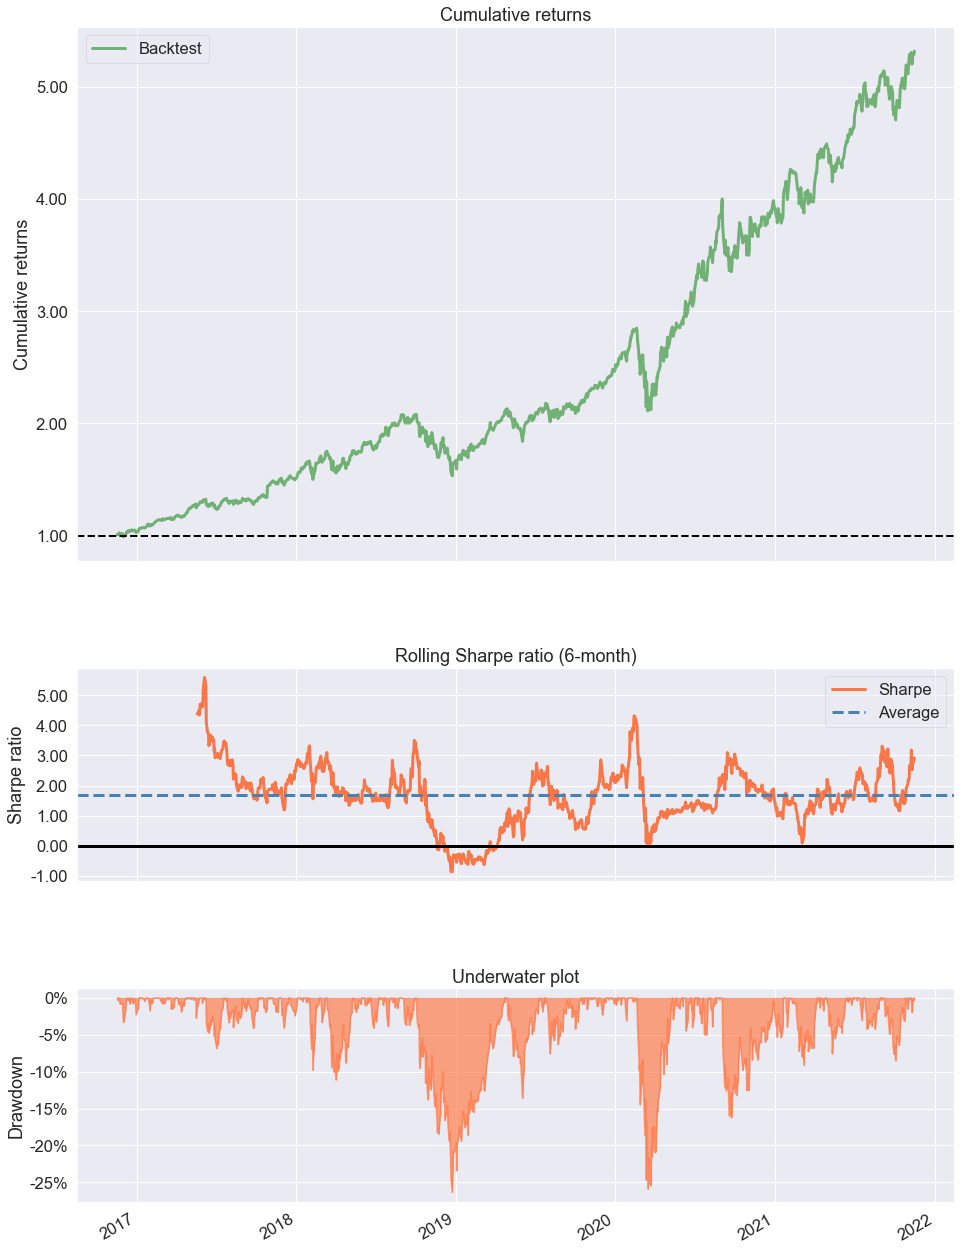

In [32]:

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Define the ticker list
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Import pandas and create a placeholder for the data
import pandas as pd
data = pd.DataFrame(columns = tech_list)

# Fetch the data
import yfinance as yf
for ticker in tech_list:
     data[ticker] = yf.download(ticker, period='5y',)['Adj Close']
        
# Compute the returns of individual stocks and then compute the daily mean returns.
# The mean return is the daily portfolio returns with the above four stocks.
data = data.pct_change().dropna().mean(axis=1)

# Import Pyfolio
import pyfolio as pf

# Get the full tear sheet
pf.create_simple_tear_sheet(data)

# Predicting the closing price stock price of GOOGLE inc

In [23]:
start_date = '2012-01-01'
end_date = datetime.now()

ticker = 'GOOG'
df_goog = yf.download(ticker, start_date, end_date)

df_goog

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-01-03   325.250885   332.827484   324.966949   331.462585   331.462585   
2012-01-04   331.273315   333.873566   329.076538   332.892242   332.892242   
2012-01-05   329.828735   330.745270   326.889740   328.274536   328.274536   
2012-01-06   328.344299   328.767700   323.681763   323.796326   323.796326   
2012-01-09   322.042908   322.291962   309.455078   310.067780   310.067780   
...                 ...          ...          ...          ...          ...   
2021-11-10  2960.195068  2974.000000  2906.500000  2932.520020  2932.520020   
2021-11-11  2942.139893  2970.044922  2933.889893  2934.959961  2934.959961   
2021-11-12  2956.629883  2997.189941  2929.080078  2992.909912  2992.909912   
2021-11-15  3000.000000  3009.540039  2973.050049  2987.760010  2987.760010   
2021-11-16  2983.409912  2996.489990  2967.000000  2993.604980  2993.604980   

              Volume  
Date                  
2012-01-03   7380561  
2012-01-04   5749470  
2012-01-05   6590410  
2012-01-06   5405987  
2012-01-09  11688849  
...              ...  
2021-11-10   1135400  
2021-11-11    623200  
2021-11-12    852000  
2021-11-15    811400  
2021-11-16    361783  

[2486 rows x 6 columns]

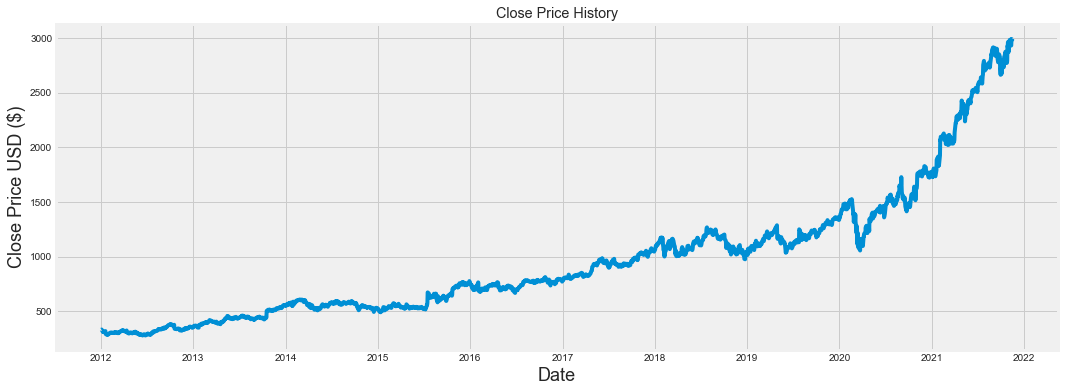

In [24]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_goog['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [25]:
data = df_goog.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
#ceiling value of 
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2362

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01951344],
       [0.02004   ],
       [0.01833926],
       ...,
       [0.999744  ],
       [0.99784725],
       [1.        ]])

In [27]:
# Create the training data set 
# Create the scaled training data set

train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01951344, 0.02004   , 0.01833926, 0.0166899 , 0.01163358,
       0.01175834, 0.01227571, 0.01295087, 0.01209775, 0.0127564 ,
       0.01355081, 0.01477269, 0.00494258, 0.00485634, 0.00401424,
       0.00191539, 0.00166037, 0.00383995, 0.00341981, 0.0038638 ,
       0.00399589, 0.00478113, 0.00683962, 0.00918064, 0.008755  ,
       0.00932008, 0.00961545, 0.00859722, 0.00975122, 0.00930357,
       0.00853301, 0.00870914, 0.00836422, 0.01008146, 0.00896966,
       0.00863391, 0.00932925, 0.009221  , 0.01088687, 0.01086119,
       0.01162258, 0.01141159, 0.01012733, 0.00842293, 0.00876051,
       0.00882289, 0.00755881, 0.00845778, 0.01077497, 0.01044656,
       0.01138957, 0.01210692, 0.01374711, 0.01365721, 0.01484791,
       0.01596155, 0.01532676, 0.01656331, 0.01613951, 0.017743  ])]
[0.016394520542771795]

[array([0.01951344, 0.02004   , 0.01833926, 0.0166899 , 0.01163358,
       0.01175834, 0.01227571, 0.01295087, 0.01209775, 0.0127564 ,
       0.01355081, 0.01477269, 0.0

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2302/2302 [==============================] - 92s 38ms/step - loss: 8.1744e-04


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


154.65701710838937

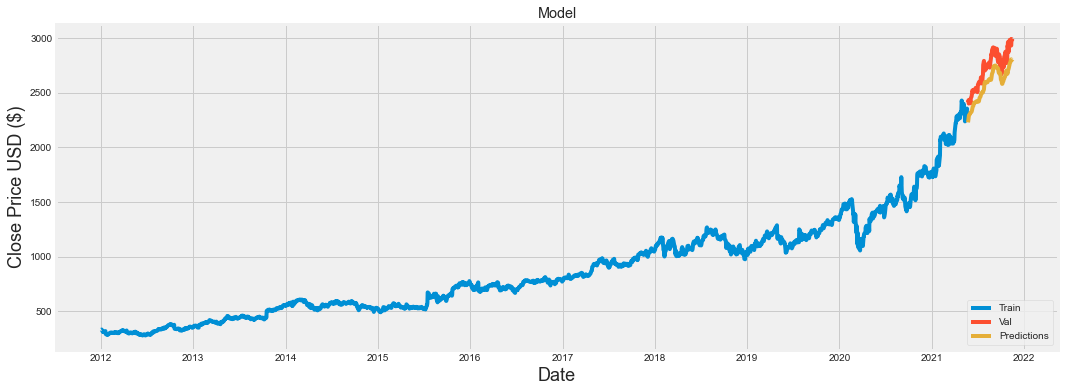

In [30]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [31]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                                
2021-05-24  2406.669922  2229.610107
2021-05-25  2409.070068  2246.233154
2021-05-26  2433.530029  2264.390869
2021-05-27  2402.510010  2284.005615
2021-05-28  2411.560059  2297.298828
...                 ...          ...
2021-11-10  2932.520020  2806.119385
2021-11-11  2934.959961  2806.220703
2021-11-12  2992.909912  2801.957764
2021-11-15  2987.760010  2803.666748
2021-11-16  2993.604980  2807.053223

[124 rows x 2 columns]

<img src="33.jpg"  width="400" height="188" style="vertical-align:middle" alt="Stock Analysis with Python" align="middle"> 